最初に必要なライブラリを読み込みます。

In [1]:
from sympy import *
from sympy.physics.quantum import *
from sympy.physics.quantum.qubit import Qubit, QubitBra, measure_all, measure_all_oneshot
from sympy.physics.quantum.gate import H,X,Y,Z,S,T,CPHASE,CNOT,SWAP,UGate,CGateS,gate_simp
from sympy.physics.quantum.gate import IdentityGate as _I
from sympy.physics.quantum.qft import *

from sympy.printing.dot import dotprint
init_printing()

%matplotlib inline
import matplotlib.pyplot as plt
from sympy.physics.quantum.circuitplot import CircuitPlot,labeller, Mz,CreateOneQubitGate


## （狭義の）量子プログラミングの手順

1. 計算に必要な量子ビット（量子レジスタ）を準備して、その値を初期化する

2. 量子計算をユニタリ行列（ゲート演算子）で記述する

3. ユニタリ行列を量子ビットに作用する

4. 測定する


#### （１の例）計算に必要な量子ビット（量子レジスタ）を準備して、その値を初期化する

In [2]:
# 全て 0 の３量子ビットを準備
Qubit('000')

#### （２の例）量子計算をユニタリ行列（ゲート演算子）で記述する

In [3]:
# 基本的なユニタリ演算子
pprint(represent(X(0),nqubits=1))
pprint(represent(Y(0),nqubits=1))
pprint(represent(Z(0),nqubits=1))
pprint(represent(H(0),nqubits=1))
pprint(represent(S(0),nqubits=1))
pprint(represent(S(0)**(-1),nqubits=1))
pprint(represent(T(0),nqubits=1))
pprint(represent(T(0)**(-1),nqubits=1))
pprint(represent(CNOT(1,0),nqubits=2))

⎡0  1⎤
⎢    ⎥
⎣1  0⎦
⎡0  -ⅈ⎤
⎢     ⎥
⎣ⅈ  0 ⎦
⎡1  0 ⎤
⎢     ⎥
⎣0  -1⎦
⎡0.707106781186547  0.707106781186547 ⎤
⎢                                     ⎥
⎣0.707106781186547  -0.707106781186547⎦
⎡1  0⎤
⎢    ⎥
⎣0  ⅈ⎦
⎡1  0 ⎤
⎢     ⎥
⎣0  -ⅈ⎦
⎡1   0  ⎤
⎢       ⎥
⎢    ⅈ⋅π⎥
⎢    ───⎥
⎢     4 ⎥
⎣0  ℯ   ⎦
⎡1    0   ⎤
⎢         ⎥
⎢    -ⅈ⋅π ⎥
⎢    ─────⎥
⎢      4  ⎥
⎣0  ℯ     ⎦
⎡1  0  0  0⎤
⎢          ⎥
⎢0  1  0  0⎥
⎢          ⎥
⎢0  0  0  1⎥
⎢          ⎥
⎣0  0  1  0⎦


#### （３の例）ユニタリ行列を量子ビットに作用する

In [4]:
# ユニタリ行列を量子ビットに作用するには、qapply() を使います。
hadamard3 = H(2)*H(1)*H(0)
qapply(hadamard3*Qubit('000'))

#### （４の例）測定する

In [5]:
# 測定は、qapply() した量子状態に対して、measure_all_oneshot() で確率的な結果を得ます。
for i in range(10):
    pprint(measure_all_oneshot(qapply(hadamard3*Qubit('000'))))

❘101⟩
❘111⟩
❘000⟩
❘001⟩
❘001⟩
❘110⟩
❘101⟩
❘100⟩
❘010⟩
❘110⟩


In [6]:
# SymPyの量子シミュレーターでは、内部で量子状態を厳密に計算して、すべての状態を保持しています。
# そのため。measure_all() では、全ての量子状態の確率を得ることができます。
measure_all(qapply(hadamard3*Qubit('000')))

## 【練習問題】いつもの説明資料の量子回路をプログラミング手順にそって計算しましょう。

![計算例](quantum_calc_sample.png)

In [7]:
### 1. 計算に必要な量子ビット（量子レジスタ）を準備して、その値を初期化する
## ２量子ビットを 0 で初期化してください。
Qubit('00')

In [1]:
### 2. 量子計算をユニタリ行列（ゲート演算子）で記述する
## Hadamard のテンソル積 の行列表現を表示してください。



In [2]:
## CNOT を Hadamard で挟んだゲート操作 の行列表現を表示してください。



In [3]:
### 3. ユニタリ行列を量子ビットに作用する
## Hadamard のテンソル積 を `Qubit('00')` に作用してください。



In [4]:
## 次に、CNOT を Hadamard で挟んだゲート操作 を 前の状態に作用してください。




In [5]:
### 4. 測定する
## measure_all() を使って、それぞれの状態が測定される確率を表示してください。




## 【課題１】グローバーのアルゴリズム
<strong>
問１）  
１. 次の「問１の初期状態」 quest_state を入力として、この量子状態に $\lvert 111 \rangle $ が含まれるか  
　グローバーのアルゴリズムを使って調べてください。  

２. 上の条件で、この量子状態に $\lvert 101 \rangle $ が含まれるかをグローバーのアルゴリズムを  
　使って調べる考察をします。（うまくいかない例を見ます）  
　  
　・プログラムを作り、実際は、$\lvert 101 \rangle $ が高確率で検出されることを調べてください。  
　・なぜ、初期状態に含まれていない状態が検出されるか理由を考えましょう。（解答は口頭でよい）  
　  
　  
問２）  
１. 下の「問２の初期状態」quest2_state を入力として、問１と同様、  
　$\lvert 111 \rangle $ と $\lvert 101 \rangle $ の状態にの検知について  グローバーのアルゴリズムを適用して、  
　その状況を考察してください。
　  
　  
</strong>

**以降、【課題１】問１−１）の回答欄：**  

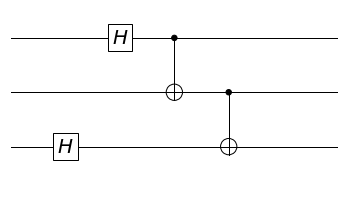

In [13]:
# 問１の初期状態
quest_state = CNOT(1,0)*CNOT(2,1)*H(2)*H(0)*Qubit('000')
CircuitPlot(quest_state,nqubits=3)

In [14]:
# 計算した初期状態を init_state とする
init_state = qapply(quest_state)
init_state

In [15]:
# 以降で役立ちそうな関数を定義します。
def CCX(c1,c2,t):  return CGateS((c1,c2),X(t))
def hadamard(s,n):
    h = H(s)
    for i in range(s+1,n+s):
       h = H(i)*h
    return h
def CCZ(c1,c2,t): return (H(t)*CCX(c1,c2,t)*H(t)) # ＣＣＺ演算子を定義します。
def DOp(n): return (Qubit('0'*n)*QubitBra('0'*n)*2-_I(0))     # ゲート操作で計算するには、上記コメントのような演算になります。
h_3 = hadamard(0,3)
d_3 = h_3 * DOp(3) * h_3    # 平均値周りの反転操作
# represent(d_3,nqubits=3)

In [6]:
# | 111 > の検索する量子回路を作成する。




In [7]:
# 上で作った量子回路を初期状態と作用させて measure_all_oneshot() で何回か試行して、結果をみる。




**以降、【課題１】問１−２）の回答欄：**  

In [8]:
# | 101 > の検索する量子回路を作成する。




In [9]:
# 上で作った量子回路を初期状態と作用させて measure_all() でかく状態の確率をみて、考察する。




**以降、【課題１】問２−１）の回答欄：**  

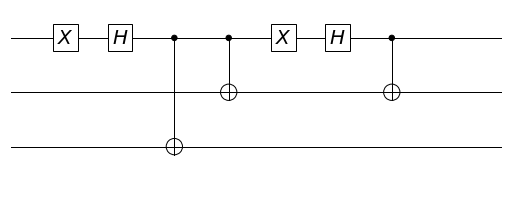

In [20]:
# 問２の初期状態
quest2_state = CNOT(2,1)*H(2)*X(2)*CNOT(2,1)*CNOT(2,0)*H(2)*X(2)*Qubit('000')
CircuitPlot(quest2_state,nqubits=3)

In [10]:
# 問２の回答欄（１）




In [11]:
# 問２の回答欄（２）




In [12]:
# 問２の回答欄（３）




## 【課題２】量子フーリエ変換
<strong>
問１）  
１. ３量子ビットを対象にした、量子フーリエ変換を行います。  
　|000>, |001>, ..., |110>, |111> の全ての状態のそれぞれの QFT の結果を出してください。    
　   
　　　ヒント）sympy.physics.quantum.qft の QFT 関数を使います。

２. QFT(0,3) の量子回路図を CircuitPlot() で作図してください。
　  
　  
問２）  
１. ３量子ビットを対象にした、量子フーリエ変換を基本的な量子ゲートだけで表してください。  
　  $\sqrt{T}$ゲートである Rk(n,4) は利用してもよい。
　  
　・演算をテンソル積で表してください。  
　・（この場合の量子回路図は、うまく描けません。）  
　  
　  
</strong>

**以降、【課題２】問１−１）の回答欄：**

In [13]:
## QFT(0,3) の行列表現を表示してください。




In [14]:
# |000> を量子フーリエ変換してください。




In [15]:
# |001> を量子フーリエ変換してください。




In [16]:
# |010> を量子フーリエ変換してください。




In [17]:
# |011> を量子フーリエ変換してください。




In [18]:
# |100> を量子フーリエ変換してください。




In [19]:
# |101> を量子フーリエ変換してください。




In [20]:
# |110> を量子フーリエ変換してください。




In [21]:
# |111> を量子フーリエ変換してください。




**以降、【課題２】問１−２）の回答欄：**

In [33]:
### QFT(0,3) は、SymPy ではひと塊りのまとまったオペレータとして定義されています。
### 基本ゲートを知るためには、decompose() を使います。
QFT(0,3).decompose()

In [22]:
# QFT(0,3) の量子回路図を CircuitPlot() で作図してください。




In [35]:
# decompose() した上記の回路を改めて、定義しなおします。
qft3_decomp = SWAP(0,2)*H(0)*CGateS((0,),S(1))*H(1)*CGateS((0,),T(2))*CGateS((1,),S(2))*H(2)
qft3_decomp

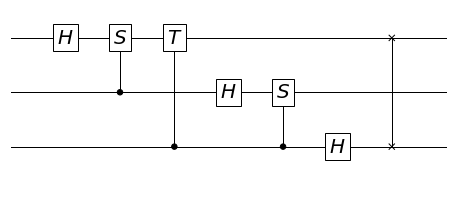

In [36]:
# 上記で定義しなおした QFT の量子回路図を CircuitPlot() で作図します。
# QFT(0,3).decompose() の量子回路図と比較してください。
CircuitPlot(qft3_decomp,nqubits=3)

**以降、【課題２】問２−１）の解答欄：**  
（ヒント）$c_{g}$ をグローバル位相として、Z軸回転
$ R_{z\theta} = c_{g} X \cdot R_{z\theta/2}^{\dagger} \cdot X \cdot R_{z\theta/2} $
と表せることを使います。

⎡1  0⎤
⎢    ⎥
⎣0  ⅈ⎦


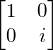

In [37]:
# S = c・X・T†・X・T であることを示します。
pprint(represent(S(0),nqubits=1))
represent(exp(I*pi/4)*X(0)*T(0)**(-1)*X(0)*T(0),nqubits=1)

⎡1   0  ⎤
⎢       ⎥
⎢    ⅈ⋅π⎥
⎢    ───⎥
⎢     4 ⎥
⎣0  ℯ   ⎦


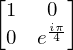

In [38]:
# T = c・X・sqrt(T)†・X・sqrt(T) であることを示します。
pprint(represent(T(0),nqubits=1))
represent(exp(I*pi/8)*X(0)*Rk(0,4)**(-1)*X(0)*Rk(0,4),nqubits=1)

In [23]:
# qft3_decomp = SWAP(0,2)*H(0)*CGateS((0,),S(1))*H(1)*CGateS((0,),T(2))*CGateS((1,),S(2))*H(2)
# qft3_decomp を見ながら、制御Ｓゲートを置き換えて、qft3_decomp2 へ代入します。




In [24]:
# qft3_decomp2 = SWAP(0,2)*H(0)*CNOT(0,1)*T(1)**(-1)*CNOT(0,1)*T(1)*H(1)*CGateS((0,),T(2))*CNOT(1,2)*T(2)**(-1)*CNOT(1,2)*T(2)*H(2)
# qft3_decomp を見ながら、制御Ｔゲートを置き換えて、qft3_decomp3 へ代入します。



In [25]:
# |000> の量子フーリエ変換の結果をみます。
### ゲート操作が少し複雑になるため、SymPyがうまく判断できません。
### represent()で計算します。解答例では、結果が縦ベクトルで行数が長くなるのを嫌い、transpose()します。

# （解答例）transpose(represent(qft3_decomp2*Qubit('000'), nqubits=3))




In [26]:
# |001> の量子フーリエ変換の結果をみます。
### グローバル位相 exp(I*pi/4) をかけると同じになります。




In [1]:
# |010> の量子フーリエ変換の結果をみます。
### グローバル位相 exp(I*pi/4) をかけると同じになります。




In [2]:
# |011> の量子フーリエ変換の結果をみます。
### グローバル位相 exp(I*pi/2) をかけると同じになります。




In [3]:
# |100> の量子フーリエ変換の結果をみます。




In [4]:
# |101> の量子フーリエ変換の結果をみます。
### グローバル位相 exp(I*pi/4) をかけると同じになります。




In [5]:
# |110> の量子フーリエ変換の結果をみます。
### グローバル位相 exp(I*pi/4) をかけると同じになります。




In [6]:
# |111> の量子フーリエ変換の結果をみます。
### グローバル位相 exp(I*pi/2) をかけると同じになります。


